# Treetime Analysis

## Setup

---

### Module Imports

In [1]:
from Bio import Phylo
from treetime.utils import parse_dates
from treetime import wrappers

import copy
import os

import pandas
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors

### Input File Paths

In [2]:
'''
tree_path = str(snakemake.input.tree)
aln_path = str(snakemake.input.snp_aln)
metadata_path = str(snakemake.input.metadata)
treetime_path = str(snakemake.output.treetime)
'''
tree_path = "../../docs/results/2020-11-09/iqtree/iqtree-core_chromosome.filter5.treefile"
metadata_path = "../../docs/results/2020-12-08/metadata/metadata.txt"

print(tree_path)
print(metadata_path)

../../docs/results/2020-11-09/iqtree/iqtree-core_chromosome.filter5.treefile
../../docs/results/2020-12-08/metadata/metadata.txt


### Constants and Variables

In [30]:
NAME_COL = "Sample"
DATES_COL = "Date"
ATTRIBUTE = "Biovar"
NO_DATA_CHAR = "NA"
COLOR_PAL = "rainbow"

file_prefix = "mugration-biovar"
tree_type = "divtree"

### Convert Newick Tree to XML

In [4]:
xml_tree = "test_convert.xml"
Phylo.convert(tree_path, "newick", xml_tree, "phyloxml")

1

In [5]:
tree = Phylo.read(xml_tree, "phyloxml")

node_i = 0

for c in tree.find_clades():
    if not c.name:
        continue
    
    # Assuming IQTREE was run to have format aLRT/UFBoot.
    name_split = c.name.split("/")
    
    # Check if the name has 'accidentally' become the confidence vals
    if (
        len(name_split) == 2 
        and float(name_split[0]) >= 0 and float(name_split[1]) <= 100
        and float(name_split[1]) >= 0 and float(name_split[1])  <= 100
        ):

        # Name the internal node
        c.name = "NODE" + str(node_i)
        
        # Assign confidence values
        alrt_val = float(name_split[0])
        alrt_conf = Phylo.PhyloXML.Confidence(alrt_val, type="alrt")
        
        ufboot_val = float(name_split[1])
        ufboot_conf = Phylo.PhyloXML.Confidence(ufboot_val, type="ufboot")
        
        c.confidences.append(alrt_conf)
        c.confidences.append(ufboot_conf)
        
        c.color = "black"       
        # Strong branch support: alrt >= 80, UFboot >= 95
        if alrt_val >= 80 and ufboot_val >= 95:
            c.color = "red"
        
        # Increment node counter
        node_i += 1

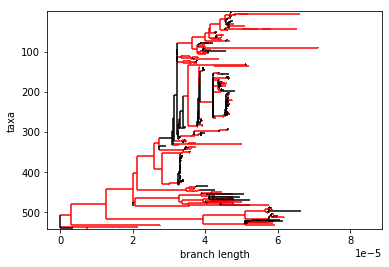

In [6]:
# Draw tree to the canvas

Phylo.draw(tree,
           show_confidence=False, 
           label_func = lambda x:'', 
           do_show=False)

In [7]:
# Sanity check
for c in tree.find_clades():
    print(c, c.name, c.branch_length, c.confidences)

NODE0 NODE0 None [Confidence(type='alrt', value=77.8), Confidence(type='ufboot', value=96.0)]
NODE1 NODE1 3.0272e-06 [Confidence(type='alrt', value=98.2), Confidence(type='ufboot', value=100.0)]
NODE2 NODE2 9.6807e-06 [Confidence(type='alrt', value=100.0), Confidence(type='ufboot', value=100.0)]
NODE3 NODE3 7.4258e-06 [Confidence(type='alrt', value=100.0), Confidence(type='ufboot', value=100.0)]
NODE4 NODE4 1.1729e-06 [Confidence(type='alrt', value=95.4), Confidence(type='ufboot', value=100.0)]
NODE5 NODE5 4.4892e-06 [Confidence(type='alrt', value=100.0), Confidence(type='ufboot', value=100.0)]
NODE6 NODE6 1.4074e-06 [Confidence(type='alrt', value=97.9), Confidence(type='ufboot', value=100.0)]
NODE7 NODE7 3.7661e-06 [Confidence(type='alrt', value=100.0), Confidence(type='ufboot', value=73.0)]
NODE8 NODE8 2.35e-08 [Confidence(type='alrt', value=0.0), Confidence(type='ufboot', value=62.0)]
NODE9 NODE9 4.691e-07 [Confidence(type='alrt', value=87.2), Confidence(type='ufboot', value=73.0)]


GCA_000269105.1_ASM26910v1_genomic GCA_000269105.1_ASM26910v1_genomic 2.346e-07 []
NODE251 NODE251 2.35e-08 [Confidence(type='alrt', value=0.0), Confidence(type='ufboot', value=12.0)]
NODE252 NODE252 2.35e-08 [Confidence(type='alrt', value=0.0), Confidence(type='ufboot', value=12.0)]
GCA_000268445.1_ASM26844v1_genomic GCA_000268445.1_ASM26844v1_genomic 2.35e-08 []
NODE253 NODE253 2.346e-07 [Confidence(type='alrt', value=78.3), Confidence(type='ufboot', value=79.0)]
NODE254 NODE254 1.1729e-06 [Confidence(type='alrt', value=97.9), Confidence(type='ufboot', value=100.0)]
GCA_000268725.1_ASM26872v1_genomic GCA_000268725.1_ASM26872v1_genomic 2.35e-08 []
GCA_000268725.2_ASM26872v2_genomic GCA_000268725.2_ASM26872v2_genomic 2.35e-08 []
GCA_000268905.1_ASM26890v1_genomic GCA_000268905.1_ASM26890v1_genomic 2.346e-07 []
NODE255 NODE255 2.35e-08 [Confidence(type='alrt', value=0.0), Confidence(type='ufboot', value=33.0)]
NODE256 NODE256 2.346e-07 [Confidence(type='alrt', value=73.6), Confidence(ty

GCA_006546725.1_ASM654672v1_genomic GCA_006546725.1_ASM654672v1_genomic 2.35e-08 []
NODE411 NODE411 2.35e-08 [Confidence(type='alrt', value=0.0), Confidence(type='ufboot', value=84.0)]
NODE412 NODE412 3.979e-07 [Confidence(type='alrt', value=84.9), Confidence(type='ufboot', value=100.0)]
NODE413 NODE413 1.21459e-05 [Confidence(type='alrt', value=100.0), Confidence(type='ufboot', value=100.0)]
NODE414 NODE414 6.1625e-06 [Confidence(type='alrt', value=100.0), Confidence(type='ufboot', value=100.0)]
NODE415 NODE415 2.346e-07 [Confidence(type='alrt', value=74.2), Confidence(type='ufboot', value=100.0)]
NODE416 NODE416 2.5803e-06 [Confidence(type='alrt', value=100.0), Confidence(type='ufboot', value=100.0)]
NODE417 NODE417 1.4074e-06 [Confidence(type='alrt', value=98.2), Confidence(type='ufboot', value=100.0)]
GCA_000007885.1_ASM788v1_genomic GCA_000007885.1_ASM788v1_genomic 1.642e-06 []
GCA_000324465.1_ASM32446v1_genomic GCA_000324465.1_ASM32446v1_genomic 2.346e-07 []
GCA_000324525.1_ASM32

### Parse Dates

In [8]:
# Parse the metadata
states = pandas.read_csv(metadata_path, sep='\t')

# Tell treetime which column is the taxon name
if NAME_COL in states.columns:
    taxon_name = NAME_COL

# Tell treetime which column is the attribute for mugration
if ATTRIBUTE in states.columns:
    attr = ATTRIBUTE

# Get tips names
tree_tip_names = [t.name for t in tree.get_terminals()]

## Analysis

### Mugration Estimation

In [9]:
# Map the taxon name to the mugration attribute
leaf_to_attr = {x[taxon_name]:str(x[attr]) for xi, x in states.iterrows()
                    if x[attr]!=NO_DATA_CHAR and x[attr]}
print(leaf_to_attr)

{'GCA_009669545.1_ASM966954v1_genomic': 'nan', 'GCA_009669555.1_ASM966955v1_genomic': 'nan', 'GCA_009669565.1_ASM966956v1_genomic': 'nan', 'GCA_009669605.1_ASM966960v1_genomic': 'nan', 'GCA_009669625.1_ASM966962v1_genomic': 'nan', 'GCA_009669675.1_ASM966967v1_genomic': 'nan', 'GCA_009669635.1_ASM966963v1_genomic': 'nan', 'GCA_009669665.1_ASM966966v1_genomic': 'nan', 'GCA_009669725.1_ASM966972v1_genomic': 'nan', 'GCA_009669715.1_ASM966971v1_genomic': 'nan', 'GCA_009669705.1_ASM966970v1_genomic': 'nan', 'GCA_009669775.1_ASM966977v1_genomic': 'nan', 'GCA_009669765.1_ASM966976v1_genomic': 'nan', 'GCA_009669805.1_ASM966980v1_genomic': 'nan', 'GCA_009669825.1_ASM966982v1_genomic': 'nan', 'GCA_009669835.1_ASM966983v1_genomic': 'nan', 'GCA_009669845.1_ASM966984v1_genomic': 'nan', 'GCA_009669875.1_ASM966987v1_genomic': 'nan', 'GCA_009669905.1_ASM966990v1_genomic': 'nan', 'GCA_009669955.1_ASM966995v1_genomic': 'nan', 'GCA_009669925.1_ASM966992v1_genomic': 'nan', 'GCA_009669935.1_ASM966993v1_geno

In [10]:
# Run the mugration (default nan comes from previous step)
mug, letter_to_state, reverse_alphabet = wrappers.reconstruct_discrete_traits(tree, 
                                                                     leaf_to_attr, 
                                                                     missing_data="nan",
                                                                     #pc=pc, 
                                                                     #sampling_bias_correction=sampling_bias_correction, 
                                                                     verbose=4, 
                                                                     #weights=params.weights
                                                                    )



0.00	-TreeAnc: set-up
Assigned discrete traits to 327 out of 540 taxa.


0.22	-SequenceData: loaded alignment.

0.22	-SeqData: making compressed alignment...

0.22	-SequenceData: constructed compressed alignment...

0.24	-TreeAnc.infer_ancestral_sequences with method: ml, marginal
0.24	--TreeAnc._ml_anc_marginal: type of reconstruction: Marginal
0.24	---Attaching sequence profiles to leafs...
0.25	---Postorder: computing likelihoods...
0.31	---Computing root node sequence and total tree likelihood...
0.31	---Preorder: computing marginal profiles...
0.37	---TreeAnc._ml_anc_marginal: ...done
0.57	--TreeAnc.infer_gtr: counting mutations...
0.67	---TreeAnc.infer_gtr: counting mutations...done

0.67	-GTR: with alphabet: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
    	 'K', 'L', 'M', 'N']
0.67	--GTR: ambiguous character: O
0.67	----GTR: no gap symbol!
0.67	---GTR: init with dummy values!

0.67	-GTR: model inference
0.67	---GTR inference iteration 0 change: 0.2672612419124244
0.67	--

3.43	---Computing root node sequence and total tree likelihood...
3.44	---Attaching sequence profiles to leafs...
3.44	---Postorder: computing likelihoods...
3.49	---Computing root node sequence and total tree likelihood...
3.49	---Attaching sequence profiles to leafs...
3.50	---Postorder: computing likelihoods...
3.55	---Computing root node sequence and total tree likelihood...

3.55	-treeanc:optimize_gtr_rate: optimization successful. Overall rate estimated
    	 to be 30.649888
3.55	--TreeAnc.infer_gtr: counting mutations...
3.64	---TreeAnc.infer_gtr: counting mutations...done

3.64	-GTR: with alphabet: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
    	 'K', 'L', 'M', 'N']
3.64	--GTR: ambiguous character: O
3.64	----GTR: no gap symbol!
3.64	---GTR: init with dummy values!

3.64	-GTR: model inference
3.64	---GTR inference iteration 0 change: 0.2672612419124244
3.64	---GTR inference iteration 1 change: 0.0330686191772527
3.64	---GTR inference iteration 2 change: 0.00140508299763

6.18	---Computing root node sequence and total tree likelihood...
6.18	---Attaching sequence profiles to leafs...
6.18	---Postorder: computing likelihoods...
6.23	---Computing root node sequence and total tree likelihood...
6.23	---Attaching sequence profiles to leafs...
6.24	---Postorder: computing likelihoods...
6.29	---Computing root node sequence and total tree likelihood...
6.29	---Attaching sequence profiles to leafs...
6.29	---Postorder: computing likelihoods...
6.34	---Computing root node sequence and total tree likelihood...
6.34	---Attaching sequence profiles to leafs...
6.34	---Postorder: computing likelihoods...
6.40	---Computing root node sequence and total tree likelihood...
6.40	---Attaching sequence profiles to leafs...
6.40	---Postorder: computing likelihoods...
6.45	---Computing root node sequence and total tree likelihood...
6.45	---Attaching sequence profiles to leafs...
6.45	---Postorder: computing likelihoods...
6.50	---Computing root node sequence and total tree 

In [11]:
# All unique states from mugration
unique_states = sorted(letter_to_state.values())
print(unique_states)
print(len(unique_states))

['Altaica', 'Antiqua', 'Bronze Age Plague', 'Caucasica', 'First Pandemic', 'Hissarica', 'Medievalis', 'Microtus', 'Orientalis', 'Pre-First Pandemic', 'Second Pandemic', 'Talassica', 'Ulegeica', 'Xilingolensis', 'nan']
15


In [12]:
for c in mug.tree.find_clades():
    print(c, c.name, c.branch_length, c.confidences)

NODE0 NODE0 0.001 [Confidence(type='alrt', value=77.8), Confidence(type='ufboot', value=96.0)]
SAMEA3541827 SAMEA3541827 3.4365e-06 []
NODE492 NODE492 3.4031e-06 [Confidence(type='alrt', value=85.7), Confidence(type='ufboot', value=99.0)]
SAMEA104233046 SAMEA104233046 2.35e-08 []
NODE493 NODE493 3.6692e-06 [Confidence(type='alrt', value=98.2), Confidence(type='ufboot', value=100.0)]
SAMEA104233050 SAMEA104233050 7.368e-07 []
NODE494 NODE494 7.2357e-06 [Confidence(type='alrt', value=87.2), Confidence(type='ufboot', value=100.0)]
SAMEA104233047 SAMEA104233047 2.35e-08 []
NODE495 NODE495 2.237e-06 [Confidence(type='alrt', value=99.6), Confidence(type='ufboot', value=100.0)]
SAMEA104233049 SAMEA104233049 6.6e-08 []
NODE_0000005 NODE_0000005 3.0968e-06 []
SAMEA104233048 SAMEA104233048 2.35e-08 []
SAMEA3541826 SAMEA3541826 1.9169e-06 []
NODE1 NODE1 3.0272e-06 [Confidence(type='alrt', value=98.2), Confidence(type='ufboot', value=100.0)]
NODE491 NODE491 2.43781e-05 [Confidence(type='alrt', val

NODE348 NODE348 1.4074e-06 [Confidence(type='alrt', value=99.2), Confidence(type='ufboot', value=100.0)]
SAMEA5661367 SAMEA5661367 2.35e-08 []
SAMEA5661372 SAMEA5661372 2.35e-08 []
NODE344 NODE344 2.346e-07 [Confidence(type='alrt', value=80.7), Confidence(type='ufboot', value=85.0)]
SAMEA4354665 SAMEA4354665 2.35e-08 []
NODE345 NODE345 4.98e-08 [Confidence(type='alrt', value=84.0), Confidence(type='ufboot', value=53.0)]
SAMEA5661360 SAMEA5661360 2.35e-08 []
NODE346 NODE346 4.557e-07 [Confidence(type='alrt', value=79.0), Confidence(type='ufboot', value=63.0)]
SAMEA5661389 SAMEA5661389 5.13e-08 []
NODE347 NODE347 1.131e-06 [Confidence(type='alrt', value=86.9), Confidence(type='ufboot', value=98.0)]
SAMEA5661375 SAMEA5661375 9.847e-07 []
SAMEA5661390 SAMEA5661390 2.35e-08 []
NODE7 NODE7 3.7661e-06 [Confidence(type='alrt', value=100.0), Confidence(type='ufboot', value=73.0)]
NODE335 NODE335 1.8766e-06 [Confidence(type='alrt', value=99.8), Confidence(type='ufboot', value=100.0)]
GCA_0001696

GCA_000324145.1_ASM32414v1_genomic GCA_000324145.1_ASM32414v1_genomic 2.35e-08 []
GCA_000324905.1_ASM32490v1_genomic GCA_000324905.1_ASM32490v1_genomic 2.35e-08 []
NODE92 NODE92 2.35e-08 [Confidence(type='alrt', value=0.0), Confidence(type='ufboot', value=24.0)]
GCA_000320445.1_ASM32044v1_genomic GCA_000320445.1_ASM32044v1_genomic 2.346e-07 []
NODE93 NODE93 4.691e-07 [Confidence(type='alrt', value=76.6), Confidence(type='ufboot', value=97.0)]
NODE97 NODE97 9.383e-07 [Confidence(type='alrt', value=95.8), Confidence(type='ufboot', value=100.0)]
GCA_000323305.1_ASM32330v1_genomic GCA_000323305.1_ASM32330v1_genomic 2.35e-08 []
GCA_900095105.1_PRJEB15052_genomic GCA_900095105.1_PRJEB15052_genomic 2.35e-08 []
NODE94 NODE94 2.35e-08 [Confidence(type='alrt', value=0.0), Confidence(type='ufboot', value=34.0)]
GCA_000323325.1_ASM32332v1_genomic GCA_000323325.1_ASM32332v1_genomic 2.35e-08 []
NODE95 NODE95 2.35e-08 [Confidence(type='alrt', value=0.0), Confidence(type='ufboot', value=31.0)]
GCA_000

GCA_000324405.1_ASM32440v1_genomic GCA_000324405.1_ASM32440v1_genomic 4.691e-07 []
GCA_000325385.1_ASM32538v1_genomic GCA_000325385.1_ASM32538v1_genomic 2.35e-08 []
NODE161 NODE161 2.35e-08 [Confidence(type='alrt', value=0.0), Confidence(type='ufboot', value=7.0)]
GCA_000169695.1_ASM16969v1_genomic GCA_000169695.1_ASM16969v1_genomic 2.35e-08 []
NODE162 NODE162 2.35e-08 [Confidence(type='alrt', value=0.0), Confidence(type='ufboot', value=12.0)]
NODE163 NODE163 2.35e-08 [Confidence(type='alrt', value=0.0), Confidence(type='ufboot', value=6.0)]
GCA_000022825.1_ASM2282v1_genomic GCA_000022825.1_ASM2282v1_genomic 2.35e-08 []
NODE164 NODE164 2.35e-08 [Confidence(type='alrt', value=0.0), Confidence(type='ufboot', value=11.0)]
GCA_000324365.1_ASM32436v1_genomic GCA_000324365.1_ASM32436v1_genomic 2.346e-07 []
GCA_000325465.1_ASM32546v1_genomic GCA_000325465.1_ASM32546v1_genomic 2.35e-08 []
NODE165 NODE165 2.35e-08 [Confidence(type='alrt', value=0.0), Confidence(type='ufboot', value=12.0)]
NODE1

GCA_000269125.1_ASM26912v1_genomic GCA_000269125.1_ASM26912v1_genomic 2.35e-08 []
NODE242 NODE242 2.35e-08 [Confidence(type='alrt', value=0.0), Confidence(type='ufboot', value=11.0)]
NODE262 NODE262 2.35e-08 [Confidence(type='alrt', value=0.0), Confidence(type='ufboot', value=6.0)]
GCA_000268745.1_ASM26874v1_genomic GCA_000268745.1_ASM26874v1_genomic 2.35e-08 []
NODE263 NODE263 2.35e-08 [Confidence(type='alrt', value=0.0), Confidence(type='ufboot', value=11.0)]
GCA_000269225.1_ASM26922v1_genomic GCA_000269225.1_ASM26922v1_genomic 2.35e-08 []
NODE264 NODE264 2.346e-07 [Confidence(type='alrt', value=74.3), Confidence(type='ufboot', value=39.0)]
GCA_000269145.1_ASM26914v1_genomic GCA_000269145.1_ASM26914v1_genomic 2.35e-08 []
NODE265 NODE265 2.35e-08 [Confidence(type='alrt', value=0.0), Confidence(type='ufboot', value=34.0)]
GCA_000268505.1_ASM26850v1_genomic GCA_000268505.1_ASM26850v1_genomic 4.691e-07 []
NODE266 NODE266 2.346e-07 [Confidence(type='alrt', value=82.7), Confidence(type='uf

### Add Node Properties

In [13]:
for c in mug.tree.find_clades():
    if c.up is None:
        continue
    mug_attr = letter_to_state[c.cseq[0]]
    #c.other = []
    attr_other = Phylo.PhyloXML.Other(tag=ATTRIBUTE, value=mug_attr, namespace="mugration")
    c.other.append(attr_other)

In [14]:
# Write Tree File
Phylo.write(mug.tree, 
            "test_mug.xml",
            #"{}_{}".format(file_prefix, tree_type), 
            "phyloxml")

1

### Draw Mugration Tree

In [32]:
# Make a copy of the tree to edit values
mug_tree_div = copy.deepcopy(mug.tree)
# Deepest nodes first
mug_tree_div.ladderize(reverse=False)

ordered_states = []

# Get the ladderized order of attributes
for t in mug_tree_div.get_terminals():
    for prop in t.other:
        if prop.tag == "Biovar" and prop.value not in ordered_states:
            ordered_states.append(prop.value)

# Number of states that need colors
num_attr = len(unique_states[:-1])

# Create the color map for jet (darker) or rainbow (lighter)
#cmap = plt.cm.rainbow
cmap = plt.get_cmap(COLOR_PAL,num_attr)
color_list = cmap(np.linspace(0, 1, num_attr))
hex_list = [colors.to_hex(col) for col in color_list]


hex_dict = {}
for state,hex_col in zip(ordered_states, hex_list):
    hex_dict[state] = hex_col

print(hex_dict)

# Make a copy of the tree to edit values
mug_tree_div = copy.deepcopy(mug.tree)
mug_tree_div.ladderize(reverse=True)

# Color branches by attr
for c in mug_tree_div.find_clades():
    for prop in c.other:
        if prop.tag == ATTRIBUTE:
            c.color = hex_dict[prop.value]

{'Bronze Age Plague': '#8000ff', 'Antiqua': '#583dfd', 'Caucasica': '#3177f8', 'Microtus': '#0aa9ee', 'Xilingolensis': '#1dd2e2', 'Hissarica': '#45eed2', 'Talassica': '#6cfdbf', 'Altaica': '#93fda9', 'Ulegeica': '#baee91', 'Pre-First Pandemic': '#e2d277', 'Second Pandemic': '#ffa95a', 'First Pandemic': '#ff773d', 'Orientalis': '#ff3d1f', 'Medievalis': '#ff0000'}


[Text(1, 1.0, 'Bronze Age Plague'),
 Text(1, 2.0, 'Antiqua'),
 Text(1, 3.0, 'Caucasica'),
 Text(1, 4.0, 'Microtus'),
 Text(1, 5.0, 'Xilingolensis'),
 Text(1, 6.0, 'Hissarica'),
 Text(1, 7.0, 'Talassica'),
 Text(1, 8.0, 'Altaica'),
 Text(1, 9.0, 'Ulegeica'),
 Text(1, 10.0, 'Pre-First Pandemic'),
 Text(1, 11.0, 'Second Pandemic'),
 Text(1, 12.0, 'First Pandemic'),
 Text(1, 13.0, 'Orientalis'),
 Text(1, 14.0, 'Medievalis')]

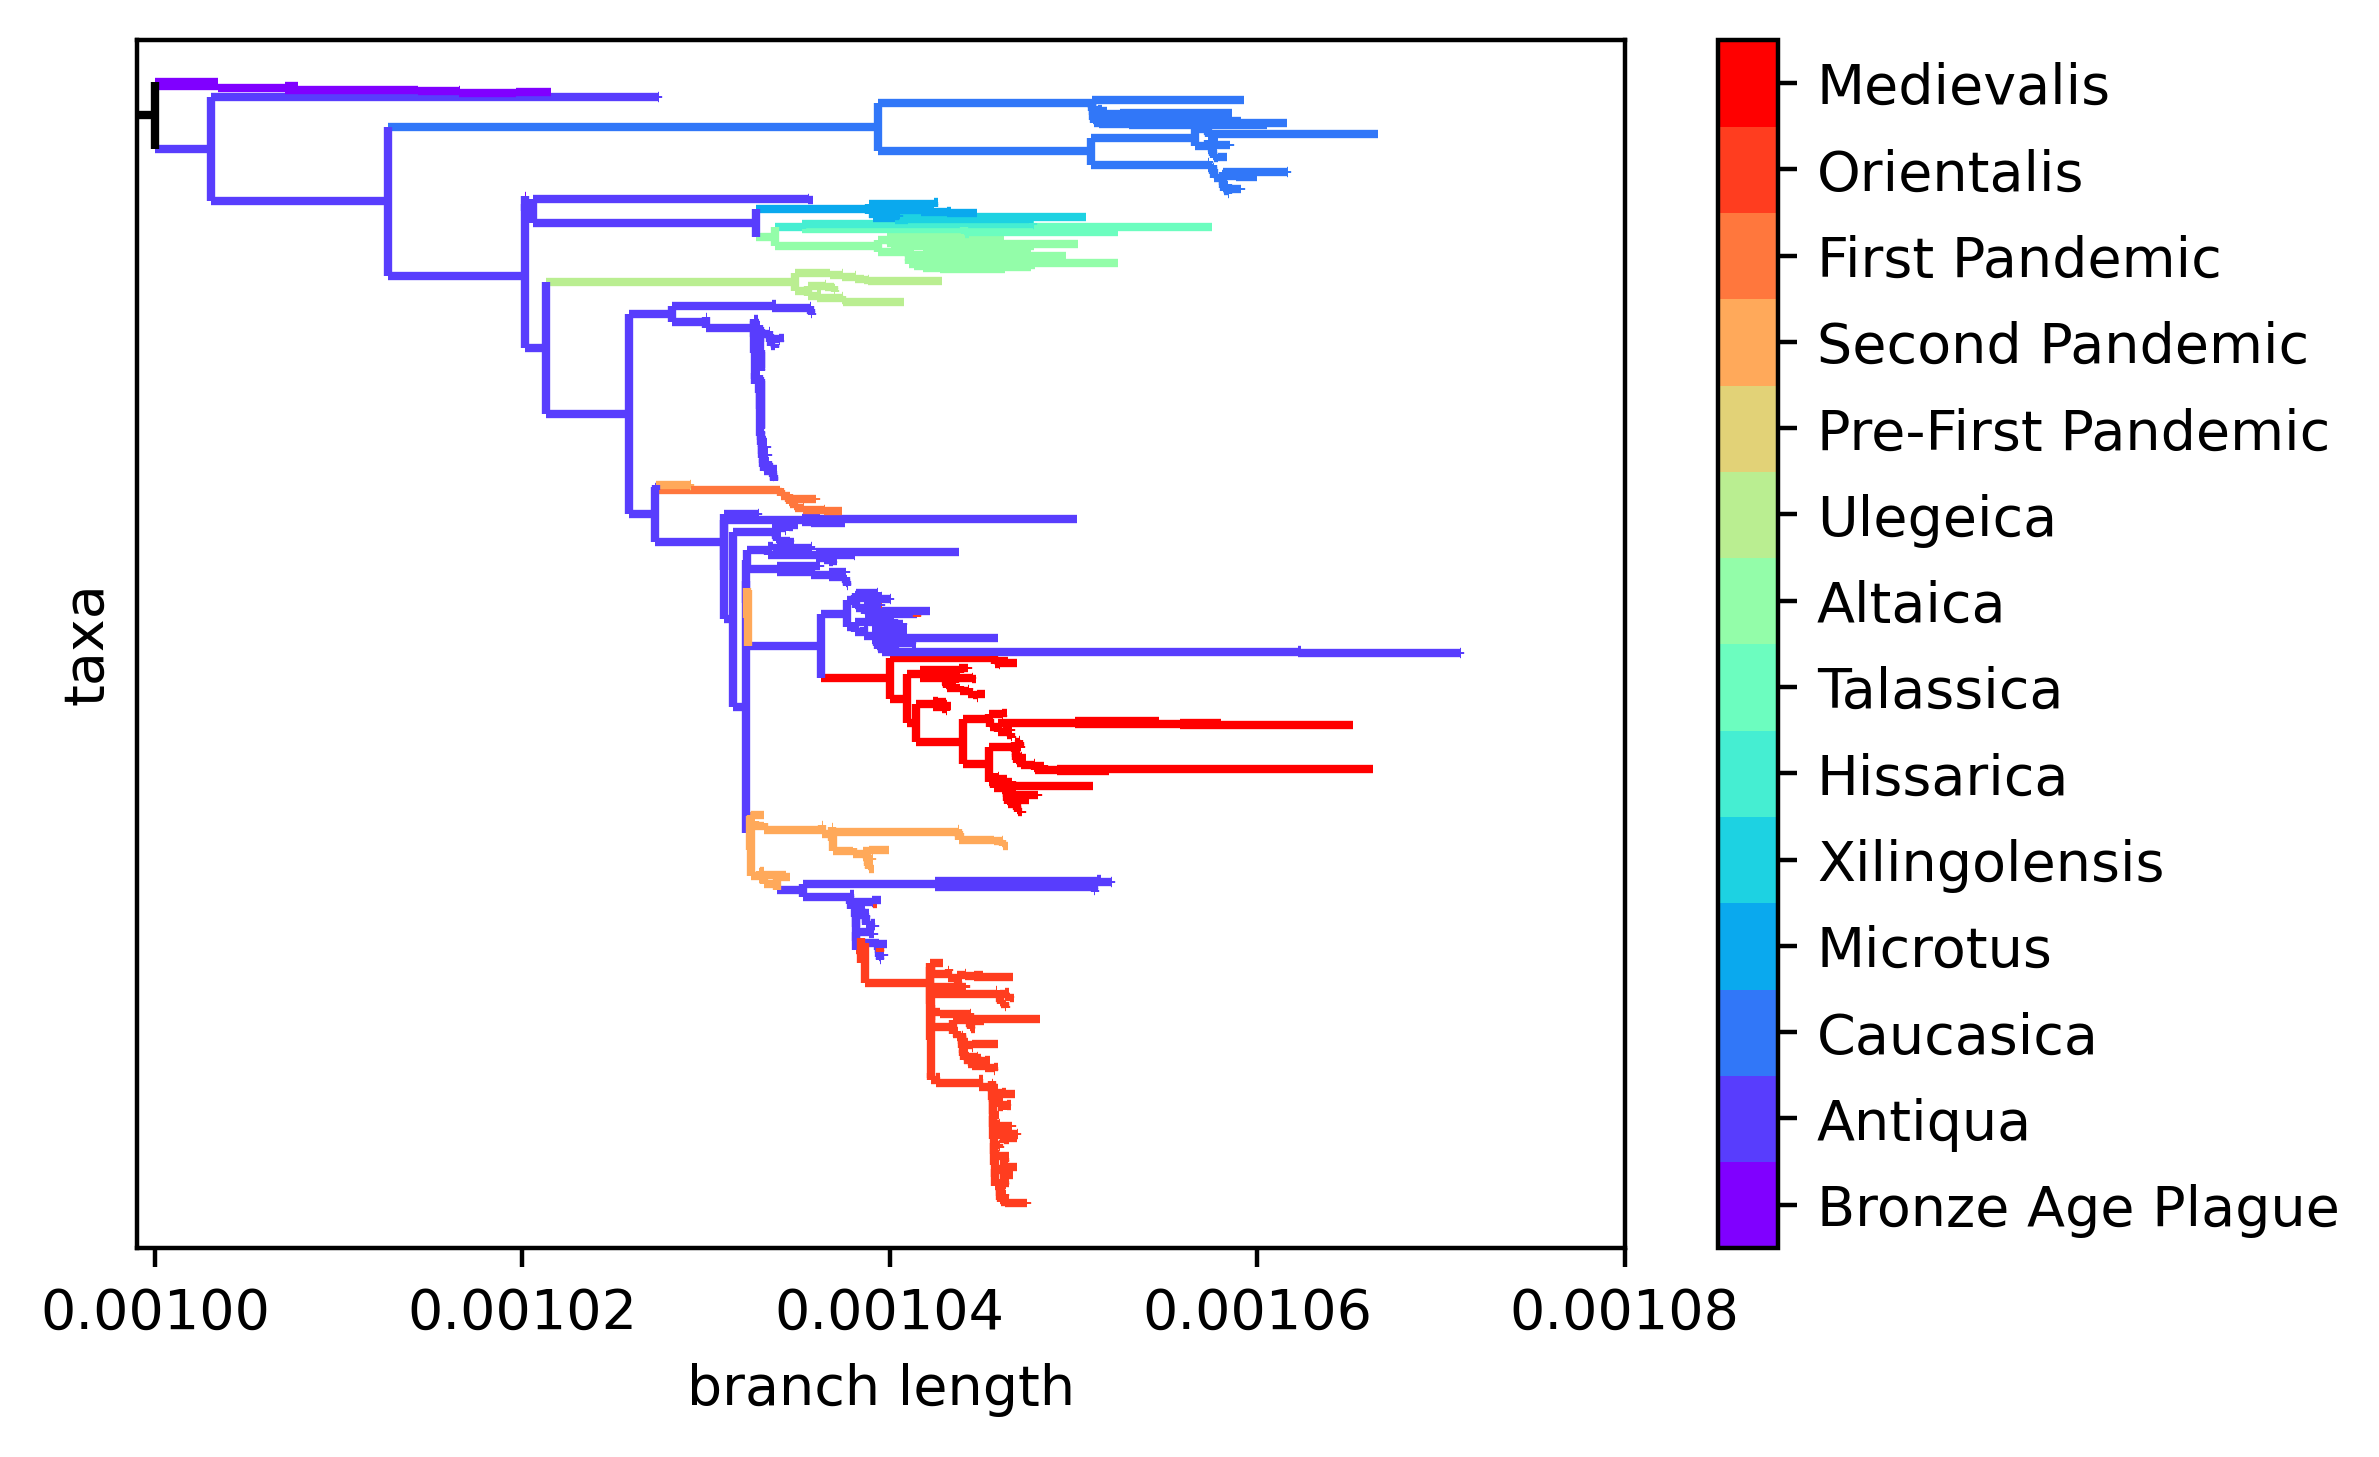

In [33]:
# Draw the tree
# ----------------------------------
# Deepest nodes last
mug_tree_div.ladderize(reverse=True)

fig = plt.figure(dpi=400)
ax = plt.subplot()

# Draw tree to the canvas
Phylo.draw(mug_tree_div, axes=ax, 
           show_confidence=False, 
           label_func = lambda x:'', 
           do_show=False)

# Root branch length set to 0.001
ax.set_xlim(0.000999,0.00108)
ax.set_ylim(-20,len(mug_tree_div.get_terminals())+20)
ax.set_yticks([])
#ax.set_xticks([])

# Create the colorbar
norm = colors.Normalize(vmin=0.5,vmax=num_attr + 0.5)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.linspace(1,num_attr,num_attr))
cbar.ax.set_yticklabels(ordered_states) 